# CPSC222 DA6 - SciPy Hypothesis Testing Exercises

Jonathan Smoley

November 17, 2021

## Imported Libraries   

In [86]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## 1. Inpatient Rehabilitation Exercise

Problem:  
I want to know who has the greatest age for a stroke, men or women?

Data:  
The dataset used has been cleaned so that the RIC's are categorical rather than continuous values. In addition, this  
data was used in DA5 for CPSC222 and contains the following attributes: ID, Gender, Age, Marital Status, RIC, and  
Admission/Discharge FIM Scores.

What Hypothesis Test To Use:  
The samples that will be compared are drawn from the one population. Testing if one mean is greater than the other  
means that a one-tailed test should be used. Finally, the sets do no rely on each other for results so they are independent.  
Therefore, in this data set I will use the one-sample, one-tailed, independent t-test.

STEP 1

$H_{o} = \mu_{women\ stroke\ age} > \mu_{men\ stroke\ age}$ 

$H_{1} = \mu_{women\ stroke\ age} <= \mu_{men\ stroke\ age}$

STEP 2

$\alpha$ = 0.01

STEP 3

$t = \frac{\overline{X_{1}} - \mu}{S / \sqrt{n}}$

STEP 4

two-tailed test  
$\alpha$ = 0.01  
df_ = 4555 - 1 = 4554

T-table values according to $\alpha$, type of test, and df  
t-critical = 2.3272

Decision Rules:
* if t-computed <= t-critical, reject $H_{o}$
* if t-computed > t-critical, do not reject $H_{o}$

STEP 5

compute t-computed  
make decision on hypothesis given t-copmuted

To get the average age to have a stroke for men and women in this dataset, I need to first read in the data from the patient_data_cleaned.csv.  
Then, I can parse for the *Stroke* RIC type. Afterwards I need to group the resulting dataset by the male and female genders. Finally, I can take  
the mean of the data split by gender and grab the age column that results from this search.

Find size of the samples by parsing for the stroke RIC and sorting by each gender.
* n_male = 607 (number of male stroke patients that had a stroke)
* n_female = 562 (number of female stroke patients that had a stroke)

In [87]:
patient_data_df = pd.read_csv("patient_data_cleaned.csv")

grouped_by_ric = patient_data_df.groupby('RIC')

stroke_instances = grouped_by_ric.get_group('Stroke')

grouped_by_gender = stroke_instances.groupby('Gender')

male_data = grouped_by_gender.get_group('M')['Age']
female_data = grouped_by_gender.get_group('F')['Age']

t, p = stats.ttest_ind(female_data, male_data, equal_var = False)

print("t-computed:", round(t, 4))

t-computed: 3.0138


## Conclusion

T-computed came out to be 3.0138. Because t-computed (3.0138) > t-critical (2.3272), the deicision is to not reject $H_{o}$.

Therefore, the hypothesis that the average stroke age for women is greater than the average stroke age for men cannot be rejected.

## 2. Piazza Student Activity Exercise

Problem:  
I want to see if there is a difference between the amount of posts to piazza by a CPSC222 class versus a CPSC315 class.

Data:  
The data files are in JSON format and contain attributes of days, posts, asks, answers, and views. There are two samples  
to draw data from; the 222 class data and the 315 class data.

What Hypothesis Test To Use:  
I will use a two-sample, one-tailed, independent t-test to conduct hypothesis testing with these datasets. Two-sample  
because there datasets from two populations to compare. One-tailed because the results needs to be greater than or less  
than due to strictly comparing a difference between posts in each class.

STEP 1

$H_{o} = \mu_{222} \neq (also\ known\ as > or <) \mu_{315}$ (difference, one is larger than the other)

$H_{1} = \mu_{222} = \mu_{315}$ (no difference)

STEP 2

$\alpha$ = 0.01

STEP 3

Independent, two-sample, one-tailed t-test formula:  
$t = \frac{\overline{X_{1}} - \overline{X_{2}}}{\sqrt{S_{p}^{2}\times(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$

STEP 4

two-tailed test  
$\alpha$ = 0.01  
$n_{1} = n_{222} = 27$  
$n_{2} = n_{315} = 62$  
$df = n_{1} + n_{2} - 2 = n_{222} + n_{315} - 2 = 27 + 62 - 2 = 87$

T-table values according to $\alpha$, type of test, and df  
t-critical = 2.37

Decision Rules:
* if t-computed = t-critical, reject $H_{o}$
* if t-computed > or < t-critical, do not reject $H_{o}$

STEP 5

compute t-computed  
make decision on hypothesis given t-copmuted



In [88]:
piazza_222_df = pd.read_json("piazza_222_users.json")
piazza_315_df = pd.read_json("piazza_315_users.json")

posts_222 = piazza_222_df['posts']
posts_315 = piazza_315_df['posts']

t, p = stats.ttest_ind(posts_315, posts_222, equal_var = False)

print("t-computed:", round(t, 4))

t-computed: 1.8452


## Conclusion

T-computed came out to be less than t-critical, also know as not equal to t-critical.

Thus, the decision is to reject $H_{o}$ that there is no difference in the amount of posts  
between 222 students and 315 students.

## 3. IQ1 Quiz Duration Exercise

Problem:  
I want to know which out of two classes had a greater average time to complete IQ1 in that  
respective class.

Data:  
There is a fractional amount of hours accounting for the time each student in 222 and in  
315 took to complete IQ1. Also, there is an attribute for whether the student took the quiz  
in-person or online. This is what the comparison will be drawn between.

What Hypothesis Test To Use:  
Because the data needed is split into two samples, a two-sample t-test should be used. There  
are two samples drawn from the same population that do not affect one another, thus an  
independent t-test in needed. Finally, the hypothesis is testing for values that are greater  
than one specific point in the measurement scale so this is a one-tailed t-test as well. Thus,  
I will use the independent, two-sample, one-tailed t-test to test this hypothesis.

STEP 1

$H_{o} = \mu_{remote} > \mu_{in-person}$  

$H_{1} = \mu_{remote} <= \mu_{in-person}$

STEP 2

$\alpha$ = 0.005

STEP 3

$t = \frac{\overline{X_{1}} - \overline{X_{2}}}{\sqrt{S_{p}^{2}\times(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$

STEP 4

one-tailed  
$\alpha$ = 0.005  
n = 94  
df = $n_{1} + n_{2}$ - 2 = 48 + 46 - 2 = 92

reference a t-table to find t-critical:  
t-critical = 2.6303

Decision Rules:
* if t-computed < t-critical, reject $H_{o}$
* if t-computed >= t-critical, do not reject $H_{o}$

STEP 5

compute t-computed  
test against decision rules to take decision

In [89]:
IQ1_quiz_durations_df = pd.read_csv("IQ1_quiz_durations.csv")

grouped_by_loc = IQ1_quiz_durations_df.groupby('In-person')

remote_data = grouped_by_loc.get_group(0)
remote_mean = remote_data['Hours Start to Finish'].mean()
remote_std = remote_data['Hours Start to Finish'].std()

live_data = grouped_by_loc.get_group(1)
live_mean = live_data['Hours Start to Finish'].mean()
live_std = live_data['Hours Start to Finish'].std()

t_computed = (remote_mean - live_mean) / np.sqrt((remote_std ** 2 / len(remote_data)) + (live_std ** 2 / len(live_data)))

print("t-computed:", round(t_computed, 4))

t-computed: 4.1463


## Conclusion

T-computed came out to be greater than t-critical (4.1463 > 2.6303). Following the decision rules,  
the decision is to not reject $H_{o}$.

By not rejecting $H_{o}$, I am claiming that the average duration to take IQ1 was greater for  
the students that took IQ1 remote in comparison to the students that took IQ1 in-person.

## 4. Circuit Trial Exercise

Problem:  
During a circuit trial period, each subject completed the same task two times with a week  
between completions. The subjects received physical therapy in between the two tasks.    
I want to test to see if there was a difference in duration for completions among those who  
received therapy and those who did not.

Data:  
The data set contains attributes for a participant's ID, their trial ID, and the time taken  
to complete the circuit (given in seconds).

What Hypothesis Test To Use:  
First off, this will be a dependent test as the second sample contains a modified version of  
the data in the first sample (a condition was added to some of the instances). This will also  
be a two-sample test given that there is a comparison between two different samples taken  
from the population of data. Lastly, this will be a one-tailed test because the hypothesis requires  
only a one-sided result to affirm its claim.

STEP 1

$H_{o} = \mu_{B-Duration} < \mu_{A-Duration}$

$H_{1} = \mu_{B-Duration} >= \mu_{A-Duration}$

STEP 2

$\alpha$ = 0.01

STEP 3

$t = \frac{\overline{d} - \mu_{d}}{S_{\overline{d}}}$

STEP 4

one-tailed  
$\alpha$ = 0.01   
$n_{A} = n_{B}$ = 27  
df = 27 + 27 - 2 = 52  

t-table value for t-critical using $\alpha$, one-tailed, and df:  
t-critical = 2.4002

Decision Rules:
* if t-computed >= t-critical (2.4002), reject $H_{o}$
* if t-computed < t-critical (2.4002), do not reject $H_{o}$

STEP 5

compute t-computed  
make decision by applying t-computed to decision rules

In [90]:
circuit_df = pd.read_csv("circuit_trials.csv")

grouped_by_trial = circuit_df.groupby('Trial ID')

a_data = grouped_by_trial.get_group('A')['Duration']
b_data = grouped_by_trial.get_group('B')['Duration']

t, p = stats.ttest_rel(a_data, b_data)

print("t-computed:", round(t, 4))

t-computed: 3.3367


## Conclusion

Due to a t-computed of 3.3367, $H_{o}$ will be rejected because 3.3367 >= 2.4002.

This means that the average time taken to complete the circuit after physical therapy (B)  
was not less than the average time taken to complete the circuit before phyical therapy (A).

## 5. GU Website Data Exercise

I have a dataset of the visits to the GU website between January 2018 and October 2021. The dataset  
consists of attributes for the date, the number of new visitors, and the number of returning visitors.  
I want to know which weeks of the 2020-2021 school year did the average new visitors outnumber the  
average returning visitors. My hypothesis is that during the time of march madness the GU website  
received, on average, a greater number of new visitors than returning visitors.

First, I want to read the data in from the .csv containing my dataset. However, I also want to  
slice between the dates that March Madness began and ended. Those dates are March 18th, 2021  
and April 5th, 2021.

In [91]:
GU_website_df = pd.read_csv("GU_website_daily_vistors_2018-2021.csv")

# March Madness 2021 lasted from the week of March 11th, 2021 to the 
# week of April 10th, 2021.
for day in range(len(GU_website_df)):
    if '2021-03-11' in GU_website_df['Date'][day]:
        i = day
    if '2021-04-10' in GU_website_df['Date'][day]:
        j = day

march_madness_data = GU_website_df[i:j+1]

print(march_madness_data)

            Date  New Visitor  Returning Visitor
1165  2021-03-11         5970               6943
1166  2021-03-12         4884               4659
1167  2021-03-13         3931               2884
1168  2021-03-14         6643               3633
1169  2021-03-15         8588               6889
1170  2021-03-16         6911               6483
1171  2021-03-17         8809               6501
1172  2021-03-18        10385               6967
1173  2021-03-19        10660               5355
1174  2021-03-20        19771               4199
1175  2021-03-21         9814               5125
1176  2021-03-22        26218               8590
1177  2021-03-23        10995               7865
1178  2021-03-24         8641               7034
1179  2021-03-25         6778               6514
1180  2021-03-26         7307               5545
1181  2021-03-27         9431               3746
1182  2021-03-28        40412               7468
1183  2021-03-29        12928               8603
1184  2021-03-30    

Now I would gather the means and standard deviations for the new visitors attribute and the  
returning visitors attribute within the sliced period of the population provided by the dataset.

Because there are member functions for these tasks, I can call the data generated above directly  
into those functions.

In [112]:
new_mean = np.mean(march_madness_data['New Visitor'])
returning_mean = np.mean(march_madness_data['Returning Visitor'])

new_std = np.std(march_madness_data['New Visitor'])
returning_std = np.std(march_madness_data['Returning Visitor'])

new_range = [np.max(march_madness_data['New Visitor']), np.min(march_madness_data['New Visitor'])]
returning_range = [np.max(march_madness_data['Returning Visitor']), np.min(march_madness_data['Returning Visitor'])]

Following these computations, I will better visualize the findings by plotting them in  
a standard plot format using matplotlib.pyplot.

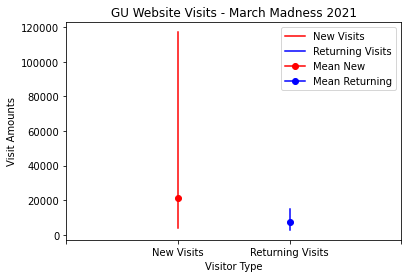

In [117]:
plt.plot([1, 1], new_range, color = 'r', label = 'New Visits')
plt.plot([2, 2], returning_range, color = 'b', label = 'Returning Visits')
plt.plot([1], new_mean, marker = 'o', color = 'r', label = 'Mean New')
plt.plot([2], returning_mean, marker = 'o', color = 'b', label = 'Mean Returning')
plt.xticks([0, 1, 2, 3], ["", "New Visits", "Returning Visits", ""])
plt.title("GU Website Visits - March Madness 2021")
plt.xlabel("Visitor Type")
plt.ylabel("Visit Amounts")
plt.legend()
plt.show()

Following these computations, I will visualize the range of visits during March Madness  
using the standard maplotlib.pyplot plot() to graph a range of values and their mean.

Next I would like to test my hypothesis with a t-test. First, I will test it manually with  
the formula for a t-test that is two-sample, one-tailed, and independent. Afterwards, I will  
check my work using SciPy. I am using a level of significance of 0.05 and, because my sample  
has 30 values, my degrees of freedom are 29 (n - 1). These value will be useful in determining  
t-critical for my Decision Rules.

$H_{o} = \mu_{new} > \mu_{returning}$

$H_{1} = \mu_{new} <= \mu_{returning}$

$\alpha = 0.05$

To compute t-computed, I will need to use the formula for a two-sample, one-tailed t-test.

$t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{S_{p}^{2}\times(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$

df = n - 1 = 30 - 1 = 29

from a t-table: t-critical = 1.6991

Decision Rules:
* if t-computed <= t-critical (1.6991), then I will reject $H_{o}$
* if t-computed > t-critical (1.6991), then I will not reject $H_{o}$

In [119]:
t_computed = (new_mean - returning_mean) / np.sqrt((new_std ** 2 / len(march_madness_data)) + (returning_std ** 2 / len(march_madness_data)))
print("t-computed manually:", round(t_computed, 4))

t, p = stats.ttest_ind(march_madness_data['New Visitor'], march_madness_data['Returning Visitor'], equal_var = False)

print("t-computed w/ SciPy:", round(t, 4))

t-computed manually: 2.7411
t-computed w/ SciPy: 2.6965


## Conclusion

While I recognize that my t-computed manually and t-computed through SciPy do not align,  
the more important consideration is that either one is greater than t-critical. Thus, my decision  
is to no reject $H_{o}$ which states that the mean number of new visits to the GU website during  
March Madness outnumbers the mean number of returning visits in the same period.